# Deep Universal Regular Conditional Expectations:

---
This implements the universal deep neural model of $\mathcal{NN}_{1_{\mathbb{R}^n},\mathcal{D}}^{\sigma:\star}$ [Anastasis Kratsios](https://people.math.ethz.ch/~kratsioa/) - 2021.

---

## What does this code do?
1. Learn Heteroskedastic Non-Linear Regression Problem
     - $Y\sim f_{\text{unkown}}(x) + \epsilon$ where $f$ is an known function and $\epsilon\sim Laplace(0,\|x\|)$
2. Learn Random Bayesian Network's Law:
    - $Y = W_J Y^{J-1}, \qquad Y^{j}\triangleq \sigma\bullet A^{j}Y^{j-1} + b^{j}, \qquad Y^0\triangleq x$

3. In the above example if $A_j = M_j\odot \tilde{A_j}$ where $\tilde{A}_j$ is a deterministic matrix and $M_j$ is a "mask", that is, a random matrix with binary entries and $\odot$ is the Hadamard product then we recover the dropout framework.
4. Learn the probability distribution that the unique strong solution to the rough SDE with uniformly Lipschitz drivers driven by a factional Brownian motion with Hurst exponent $H \in [\frac1{2},1)$:
$$
X_t^x = x + \int_0^t \alpha(s,X_s^x)ds + \int_0^t \beta(s,X_s^x)dB_s^H
$$
belongs, at time $t=1$, to a ball about the initial point $x$ of random radius given by an independant exponential random-variable with shape parameter $\lambda=2$
5. Train a DNN to predict the returns of bitcoin with GD.  Since this has random initialization then each prediction of a given $x$ is stochastic...We learn the distribution of this conditional RV (conditioned on x in the input space).
$$
Y_x \triangleq \hat{f}_{\theta_{T}}(x), \qquad \theta_{(t+1)}\triangleq \theta_{(t)} + \lambda \sum_{x \in \mathbb{X}} \nabla_{\theta}\|\hat{f}_{\theta_t}(x) - f(x)\|, \qquad \theta_0 \sim N_d(0,1);
$$
$T\in \mathbb{N}$ is a fixed number of "SGD" iterations (typically identified by cross-validation on a single SGD trajectory for a single initialization) and where $\theta \in \mathbb{R}^{(d_{J}+1)+\sum_{j=0}^{J-1} (d_{j+1}d_j + 1)}$ and $d_j$ is the dimension of the "bias" vector $b_j$ defining each layer of the DNN with layer dimensions:
$$
\hat{f}_{\theta}(x)\triangleq A^{(J)}x^{(J)} + b^{(J)},\qquad x^{(j+1)}\triangleq \sigma\bullet A^{j}x^{(j)} + b^{j},\qquad x^{(0)}\triangleq x
.
$$

In [1]:
# Load Packages/Modules
exec(open('Init_Dump.py').read())

Using TensorFlow backend.


#### Mode:
Software/Hardware Testing or Real-Deal?

In [2]:
trial_run = False

### Simulation Method:

In [3]:
# # Random DNN
# f_unknown_mode = "Heteroskedastic_NonLinear_Regression"

# # Random DNN internal noise
# # f_unknown_mode = "DNN_with_Random_Weights"
Depth_Bayesian_DNN = 2
width = 50

# # Random Dropout applied to trained DNN
# f_unknown_mode = "DNN_with_Bayesian_Dropout"
Dropout_rate = 0.1

# # Rough SDE (time 1)
# f_unknown_mode = "Rough_SDE"

# GD with Randomized Input
f_unknown_mode = "GD_with_randomized_input"
GD_epochs = 100

## Problem Dimension

In [4]:
problem_dim = 2

## Note: *Why the procedure is so computationally efficient*?
---
 - The sample barycenters do not require us to solve for any new Wasserstein-1 Barycenters; which is much more computationally costly,
 - Our training procedure never back-propages through $\mathcal{W}_1$ since steps 2 and 3 are full-decoupled.  Therefore, training our deep classifier is (comparatively) cheap since it takes values in the standard $N$-simplex.

---

#### Rough SDE Meta-Parameters

In [5]:
# SDE with Rough Driver
N_Euler_Steps = 10**1
Hurst_Exponent = 0.01

def alpha(t,x):
    output_drift_update = t-x
    return output_drift_update

def beta(t,x):
    output_vol_update = (t+0.001)*np.diag(np.cos(x))
    return output_vol_update

#### Grid Hyperparameter(s)
- Ratio $\frac{\text{Testing Datasize}}{\text{Training Datasize}}$.
- Number of Training Points to Generate

In [6]:
train_test_ratio = .2
N_train_size = 10**1

Monte-Carlo Paramters

In [7]:
## Monte-Carlo
N_Monte_Carlo_Samples = 10**4

Initial radis of $\delta$-bounded random partition of $\mathcal{X}$!

In [8]:
# Hyper-parameters of Cover
delta = 0.01
Proportion_per_cluster = .75

# Run Main:

------------------------------
Running script for main model!
------------------------------
Deep Feature Builder - Ready
Deep Classifier - Ready
Deep Feature Builder - Ready
#================================================#
 Training Datasize: 170 and test datasize: 42.  
#================================================#
Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 474.7013 - mse: 528283.7500 - mae: 474.7013 - mape: 100.0995
Epoch 2/100
6/6 [==============================] - 0s 1ms/step - loss: 474.6953 - mse: 528272.5000 - mae: 474.6953 - mape: 100.1070
Epoch 3/100
6/6 [==============================] - 0s 1ms/step - loss: 474.6865 - mse: 528253.4375 - mae: 474.6865 - mape: 100.1159
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 474.6745 - mse: 528227.3125 - mae: 474.6745 - mape: 100.1214
Epoch 5/100
6/6 [==============================] - 0s 1ms/step - loss: 474.6551 - mse: 528181.8750 - mae: 474.6551 - mape: 100.1307
Epoch 6/100
6/

6/6 [==============================] - 0s 2ms/step - loss: 310.8512 - mse: 291452.8750 - mae: 310.8512 - mape: 299.9855
Epoch 22/100
6/6 [==============================] - 0s 2ms/step - loss: 310.2508 - mse: 290686.7188 - mae: 310.2508 - mape: 300.3934
Epoch 23/100
6/6 [==============================] - 0s 2ms/step - loss: 309.7739 - mse: 290287.3438 - mae: 309.7739 - mape: 300.7635
Epoch 24/100
6/6 [==============================] - 0s 2ms/step - loss: 309.2284 - mse: 289596.5312 - mae: 309.2284 - mape: 301.6659
Epoch 25/100
6/6 [==============================] - 0s 2ms/step - loss: 308.7508 - mse: 289030.6250 - mae: 308.7508 - mape: 302.2371
Epoch 26/100
6/6 [==============================] - 0s 1ms/step - loss: 308.2765 - mse: 288415.3750 - mae: 308.2765 - mape: 302.6357
Epoch 27/100
6/6 [==============================] - 0s 2ms/step - loss: 307.7908 - mse: 287829.3438 - mae: 307.7908 - mape: 302.3907
Epoch 28/100
6/6 [==============================] - 0s 2ms/step - loss: 307.1802 -

6/6 [==============================] - 0s 2ms/step - loss: 245.7922 - mse: 212009.6406 - mae: 245.7922 - mape: 327.9869
Epoch 43/100
6/6 [==============================] - 0s 1ms/step - loss: 245.4032 - mse: 211350.3281 - mae: 245.4032 - mape: 327.9567
Epoch 44/100
6/6 [==============================] - 0s 1ms/step - loss: 245.1704 - mse: 210939.5000 - mae: 245.1704 - mape: 327.1010
Epoch 45/100
6/6 [==============================] - 0s 2ms/step - loss: 244.7518 - mse: 210801.5781 - mae: 244.7518 - mape: 326.3619
Epoch 46/100
6/6 [==============================] - 0s 5ms/step - loss: 244.2297 - mse: 210362.7969 - mae: 244.2297 - mape: 324.9708
Epoch 47/100
6/6 [==============================] - 0s 5ms/step - loss: 243.8600 - mse: 209845.4062 - mae: 243.8600 - mape: 325.3435
Epoch 48/100
6/6 [==============================] - 0s 3ms/step - loss: 243.3065 - mse: 209348.9688 - mae: 243.3065 - mape: 323.4322
Epoch 49/100
6/6 [==============================] - 0s 2ms/step - loss: 242.9223 -

6/6 [==============================] - 0s 1ms/step - loss: 198.8245 - mse: 163568.6562 - mae: 198.8245 - mape: 255.2579
Epoch 64/100
6/6 [==============================] - 0s 1ms/step - loss: 198.5479 - mse: 163400.7969 - mae: 198.5479 - mape: 251.5320
Epoch 65/100
6/6 [==============================] - 0s 2ms/step - loss: 198.5636 - mse: 163452.0312 - mae: 198.5636 - mape: 252.4652
Epoch 66/100
6/6 [==============================] - 0s 2ms/step - loss: 198.2153 - mse: 163400.1250 - mae: 198.2153 - mape: 252.7375
Epoch 67/100
6/6 [==============================] - 0s 2ms/step - loss: 197.9791 - mse: 163105.8125 - mae: 197.9791 - mape: 251.9162
Epoch 68/100
6/6 [==============================] - 0s 2ms/step - loss: 197.6606 - mse: 162847.0156 - mae: 197.6606 - mape: 251.1141
Epoch 69/100
6/6 [==============================] - 0s 1ms/step - loss: 197.4863 - mse: 162590.4219 - mae: 197.4863 - mape: 251.3088
Epoch 70/100
6/6 [==============================] - 0s 1ms/step - loss: 197.2636 -

6/6 [==============================] - 0s 2ms/step - loss: 176.4059 - mse: 141523.1250 - mae: 176.4059 - mape: 237.5374
Epoch 86/100
6/6 [==============================] - 0s 1ms/step - loss: 176.5980 - mse: 141427.8281 - mae: 176.5980 - mape: 237.8785
Epoch 87/100
6/6 [==============================] - 0s 2ms/step - loss: 176.3013 - mse: 141295.0938 - mae: 176.3013 - mape: 240.4488
Epoch 88/100
6/6 [==============================] - 0s 2ms/step - loss: 176.0995 - mse: 141077.3594 - mae: 176.0995 - mape: 241.1550
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 175.7700 - mse: 140941.2656 - mae: 175.7700 - mape: 240.2619
Epoch 90/100
6/6 [==============================] - 0s 1ms/step - loss: 175.5469 - mse: 140661.9844 - mae: 175.5469 - mape: 239.0082
Epoch 91/100
6/6 [==============================] - 0s 1ms/step - loss: 175.6353 - mse: 140526.2500 - mae: 175.6353 - mape: 238.7271
Epoch 92/100
6/6 [==============================] - 0s 2ms/step - loss: 175.3164 -

6/6 [==============================] - 0s 1ms/step - loss: 154.5090 - mse: 111990.0391 - mae: 154.5090 - mape: 217.7750
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 154.0518 - mse: 111753.0703 - mae: 154.0518 - mape: 218.3400
Epoch 9/100
6/6 [==============================] - 0s 1ms/step - loss: 153.8658 - mse: 111610.2578 - mae: 153.8658 - mape: 216.9836
Epoch 10/100
6/6 [==============================] - 0s 1ms/step - loss: 153.8849 - mse: 111470.5859 - mae: 153.8849 - mape: 216.9363
Epoch 11/100
6/6 [==============================] - 0s 1ms/step - loss: 153.4342 - mse: 111092.3750 - mae: 153.4342 - mape: 216.1512
Epoch 12/100
6/6 [==============================] - 0s 1ms/step - loss: 153.7666 - mse: 110850.3750 - mae: 153.7666 - mape: 214.9341
Epoch 13/100
6/6 [==============================] - 0s 1ms/step - loss: 153.3993 - mse: 110673.7188 - mae: 153.3993 - mape: 213.5545
Epoch 14/100
6/6 [==============================] - 0s 1ms/step - loss: 153.2719 - m

6/6 [==============================] - 0s 2ms/step - loss: 128.1649 - mse: 81255.7734 - mae: 128.1649 - mape: 143.7197
Epoch 31/100
6/6 [==============================] - 0s 1ms/step - loss: 127.8890 - mse: 81035.8672 - mae: 127.8890 - mape: 141.4604
Epoch 32/100
6/6 [==============================] - 0s 1ms/step - loss: 127.5393 - mse: 80989.6328 - mae: 127.5393 - mape: 140.7857
Epoch 33/100
6/6 [==============================] - 0s 1ms/step - loss: 127.2574 - mse: 80818.7891 - mae: 127.2574 - mape: 138.7238
Epoch 34/100
6/6 [==============================] - 0s 1ms/step - loss: 127.0384 - mse: 80607.2500 - mae: 127.0384 - mape: 137.0042
Epoch 35/100
6/6 [==============================] - 0s 1ms/step - loss: 126.8560 - mse: 80327.0078 - mae: 126.8560 - mape: 139.2193
Epoch 36/100
6/6 [==============================] - 0s 2ms/step - loss: 126.8477 - mse: 80176.6641 - mae: 126.8477 - mape: 135.9038
Epoch 37/100
6/6 [==============================] - 0s 1ms/step - loss: 126.1584 - mse: 7

6/6 [==============================] - 0s 1ms/step - loss: 105.0049 - mse: 58202.8945 - mae: 105.0049 - mape: 54.8260
Epoch 55/100
6/6 [==============================] - 0s 1ms/step - loss: 105.5593 - mse: 58012.2344 - mae: 105.5593 - mape: 54.8782
Epoch 56/100
6/6 [==============================] - 0s 1ms/step - loss: 104.7312 - mse: 57847.4883 - mae: 104.7312 - mape: 55.1817
Epoch 57/100
6/6 [==============================] - 0s 1ms/step - loss: 104.5890 - mse: 57692.6523 - mae: 104.5890 - mape: 52.9660
Epoch 58/100
6/6 [==============================] - 0s 1ms/step - loss: 104.3380 - mse: 57486.1016 - mae: 104.3380 - mape: 52.8726
Epoch 59/100
6/6 [==============================] - 0s 2ms/step - loss: 104.2654 - mse: 57364.3125 - mae: 104.2654 - mape: 53.0978
Epoch 60/100
6/6 [==============================] - 0s 2ms/step - loss: 103.8183 - mse: 57205.9297 - mae: 103.8183 - mape: 51.0809
Epoch 61/100
6/6 [==============================] - 0s 2ms/step - loss: 104.0187 - mse: 57001.75

6/6 [==============================] - 0s 2ms/step - loss: 86.5574 - mse: 41376.2930 - mae: 86.5574 - mape: 35.3068
Epoch 81/100
6/6 [==============================] - 0s 1ms/step - loss: 86.2444 - mse: 41300.5547 - mae: 86.2444 - mape: 35.1056
Epoch 82/100
6/6 [==============================] - 0s 1ms/step - loss: 86.0169 - mse: 41142.5898 - mae: 86.0169 - mape: 35.5075
Epoch 83/100
6/6 [==============================] - 0s 1ms/step - loss: 85.9266 - mse: 41045.5664 - mae: 85.9266 - mape: 35.0733
Epoch 84/100
6/6 [==============================] - 0s 1ms/step - loss: 85.9764 - mse: 40975.1680 - mae: 85.9764 - mape: 35.4892
Epoch 85/100
6/6 [==============================] - 0s 1ms/step - loss: 85.8831 - mse: 40892.6367 - mae: 85.8831 - mape: 34.5683
Epoch 86/100
6/6 [==============================] - 0s 1ms/step - loss: 85.8290 - mse: 40739.6211 - mae: 85.8290 - mape: 34.7188
Epoch 87/100
6/6 [==============================] - 0s 1ms/step - loss: 85.5360 - mse: 40654.0312 - mae: 85.53

6/6 [==============================] - 0s 1ms/step - loss: 71.7180 - mse: 31682.8789 - mae: 71.7180 - mape: 29.4110
Epoch 7/100
6/6 [==============================] - 0s 1ms/step - loss: 71.7976 - mse: 31607.1328 - mae: 71.7976 - mape: 30.5982
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 72.1270 - mse: 31603.1816 - mae: 72.1270 - mape: 31.1118
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 71.6581 - mse: 31535.0566 - mae: 71.6581 - mape: 30.3849
Epoch 10/100
6/6 [==============================] - 0s 1ms/step - loss: 71.4695 - mse: 31517.6875 - mae: 71.4695 - mape: 29.6513
Epoch 11/100
6/6 [==============================] - 0s 1ms/step - loss: 71.1220 - mse: 31429.1641 - mae: 71.1220 - mape: 29.6494
Epoch 12/100
6/6 [==============================] - 0s 2ms/step - loss: 71.6581 - mse: 31457.5352 - mae: 71.6581 - mape: 30.2461
Epoch 13/100
6/6 [==============================] - 0s 2ms/step - loss: 71.5161 - mse: 31363.1758 - mae: 71.5161 

6/6 [==============================] - 0s 2ms/step - loss: 62.5091 - mse: 27144.0059 - mae: 62.5091 - mape: 29.0659
Epoch 33/100
6/6 [==============================] - 0s 2ms/step - loss: 62.1431 - mse: 27130.4844 - mae: 62.1431 - mape: 28.5681
Epoch 34/100
6/6 [==============================] - 0s 2ms/step - loss: 61.9664 - mse: 27107.6035 - mae: 61.9664 - mape: 28.1894
Epoch 35/100
6/6 [==============================] - 0s 2ms/step - loss: 61.6587 - mse: 27063.1641 - mae: 61.6587 - mape: 27.9694
Epoch 36/100
6/6 [==============================] - 0s 2ms/step - loss: 61.7413 - mse: 27069.8672 - mae: 61.7413 - mape: 28.6516
Epoch 37/100
6/6 [==============================] - 0s 1ms/step - loss: 61.5107 - mse: 27032.4941 - mae: 61.5107 - mape: 28.3966
Epoch 38/100
6/6 [==============================] - 0s 3ms/step - loss: 61.3851 - mse: 27015.7324 - mae: 61.3851 - mape: 27.6151
Epoch 39/100
6/6 [==============================] - 0s 2ms/step - loss: 61.5238 - mse: 27000.9473 - mae: 61.52

6/6 [==============================] - 0s 2ms/step - loss: 55.8463 - mse: 24336.6641 - mae: 55.8463 - mape: 26.2349
Epoch 59/100
6/6 [==============================] - 0s 2ms/step - loss: 55.7952 - mse: 24308.4980 - mae: 55.7952 - mape: 27.6879
Epoch 60/100
6/6 [==============================] - 0s 2ms/step - loss: 55.7725 - mse: 24310.3809 - mae: 55.7725 - mape: 26.5488
Epoch 61/100
6/6 [==============================] - 0s 2ms/step - loss: 55.8771 - mse: 24269.9199 - mae: 55.8771 - mape: 27.1709
Epoch 62/100
6/6 [==============================] - 0s 2ms/step - loss: 55.4876 - mse: 24233.7715 - mae: 55.4876 - mape: 27.2745
Epoch 63/100
6/6 [==============================] - 0s 2ms/step - loss: 55.6628 - mse: 24237.1035 - mae: 55.6628 - mape: 26.8860
Epoch 64/100
6/6 [==============================] - 0s 2ms/step - loss: 55.7524 - mse: 24211.1816 - mae: 55.7524 - mape: 26.3161
Epoch 65/100
6/6 [==============================] - 0s 2ms/step - loss: 55.3059 - mse: 24161.6094 - mae: 55.30

6/6 [==============================] - 0s 2ms/step - loss: 50.2396 - mse: 21817.2871 - mae: 50.2396 - mape: 25.4693
Epoch 85/100
6/6 [==============================] - 0s 3ms/step - loss: 50.3922 - mse: 21783.5098 - mae: 50.3922 - mape: 25.4018
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 50.6624 - mse: 21778.9512 - mae: 50.6624 - mape: 24.9937
Epoch 87/100
6/6 [==============================] - 0s 2ms/step - loss: 50.9156 - mse: 21685.1348 - mae: 50.9156 - mape: 27.1996
Epoch 88/100
6/6 [==============================] - 0s 2ms/step - loss: 50.6574 - mse: 21739.4238 - mae: 50.6574 - mape: 25.2792
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 50.4661 - mse: 21677.5918 - mae: 50.4661 - mape: 26.4233
Epoch 90/100
6/6 [==============================] - 0s 2ms/step - loss: 50.8156 - mse: 21636.5859 - mae: 50.8156 - mape: 26.5039
Epoch 91/100
6/6 [==============================] - 0s 2ms/step - loss: 50.3159 - mse: 21629.6348 - mae: 50.31

6/6 [==============================] - 0s 2ms/step - loss: 46.2167 - mse: 18998.4805 - mae: 46.2167 - mape: 24.9090
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 45.2168 - mse: 18941.4844 - mae: 45.2168 - mape: 24.3266
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 45.7536 - mse: 18937.6289 - mae: 45.7536 - mape: 24.9721
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 45.7409 - mse: 18899.5195 - mae: 45.7409 - mape: 26.8247
Epoch 13/100
6/6 [==============================] - 0s 2ms/step - loss: 45.2977 - mse: 18891.2129 - mae: 45.2977 - mape: 24.6889
Epoch 14/100
6/6 [==============================] - 0s 3ms/step - loss: 45.2497 - mse: 18868.2949 - mae: 45.2497 - mape: 23.9509
Epoch 15/100
6/6 [==============================] - 0s 2ms/step - loss: 45.0377 - mse: 18848.5195 - mae: 45.0377 - mape: 24.3382
Epoch 16/100
6/6 [==============================] - 0s 2ms/step - loss: 45.1787 - mse: 18830.4395 - mae: 45.17

6/6 [==============================] - 0s 2ms/step - loss: 41.2436 - mse: 16572.2637 - mae: 41.2436 - mape: 23.9618
Epoch 36/100
6/6 [==============================] - 0s 2ms/step - loss: 41.0718 - mse: 16571.4902 - mae: 41.0718 - mape: 22.9894
Epoch 37/100
6/6 [==============================] - 0s 2ms/step - loss: 40.8902 - mse: 16531.6211 - mae: 40.8902 - mape: 23.2613
Epoch 38/100
6/6 [==============================] - 0s 2ms/step - loss: 41.1521 - mse: 16528.1914 - mae: 41.1521 - mape: 23.8854
Epoch 39/100
6/6 [==============================] - 0s 2ms/step - loss: 40.9719 - mse: 16490.5039 - mae: 40.9719 - mape: 23.5179
Epoch 40/100
6/6 [==============================] - 0s 2ms/step - loss: 41.3760 - mse: 16502.4824 - mae: 41.3760 - mape: 23.1689
Epoch 41/100
6/6 [==============================] - 0s 2ms/step - loss: 41.3829 - mse: 16465.5078 - mae: 41.3829 - mape: 23.5490
Epoch 42/100
6/6 [==============================] - 0s 1ms/step - loss: 40.8768 - mse: 16484.0664 - mae: 40.87

6/6 [==============================] - 0s 2ms/step - loss: 37.9466 - mse: 14557.7383 - mae: 37.9466 - mape: 23.8501
Epoch 62/100
6/6 [==============================] - 0s 2ms/step - loss: 37.8183 - mse: 14512.7852 - mae: 37.8183 - mape: 22.9611
Epoch 63/100
6/6 [==============================] - 0s 3ms/step - loss: 37.9534 - mse: 14510.4941 - mae: 37.9534 - mape: 22.3366
Epoch 64/100
6/6 [==============================] - 0s 2ms/step - loss: 37.6967 - mse: 14485.3086 - mae: 37.6967 - mape: 21.8053
Epoch 65/100
6/6 [==============================] - 0s 3ms/step - loss: 37.6858 - mse: 14466.9473 - mae: 37.6858 - mape: 22.2998
Epoch 66/100
6/6 [==============================] - 0s 2ms/step - loss: 37.5324 - mse: 14455.1191 - mae: 37.5324 - mape: 22.0319
Epoch 67/100
6/6 [==============================] - 0s 3ms/step - loss: 37.7803 - mse: 14428.8770 - mae: 37.7803 - mape: 24.0279
Epoch 68/100
6/6 [==============================] - 0s 3ms/step - loss: 37.6713 - mse: 14448.4629 - mae: 37.67

6/6 [==============================] - 0s 1ms/step - loss: 33.9947 - mse: 12470.1084 - mae: 33.9947 - mape: 20.7716
Epoch 88/100
6/6 [==============================] - 0s 1ms/step - loss: 33.9207 - mse: 12437.0645 - mae: 33.9207 - mape: 20.8738
Epoch 89/100
6/6 [==============================] - 0s 1ms/step - loss: 33.9306 - mse: 12417.5400 - mae: 33.9306 - mape: 21.2510
Epoch 90/100
6/6 [==============================] - 0s 1ms/step - loss: 34.0809 - mse: 12414.4941 - mae: 34.0809 - mape: 21.1209
Epoch 91/100
6/6 [==============================] - 0s 1ms/step - loss: 33.7864 - mse: 12409.9102 - mae: 33.7864 - mape: 20.8500
Epoch 92/100
6/6 [==============================] - 0s 1ms/step - loss: 33.6199 - mse: 12389.4893 - mae: 33.6199 - mape: 20.9929
Epoch 93/100
6/6 [==============================] - 0s 1ms/step - loss: 33.4361 - mse: 12384.3584 - mae: 33.4361 - mape: 21.0332
Epoch 94/100
6/6 [==============================] - 0s 1ms/step - loss: 33.6832 - mse: 12371.1709 - mae: 33.68

6/6 [==============================] - 0s 1ms/step - loss: 30.0514 - mse: 10603.6396 - mae: 30.0514 - mape: 20.5616
Epoch 14/100
6/6 [==============================] - 0s 1ms/step - loss: 30.0884 - mse: 10576.5645 - mae: 30.0884 - mape: 19.9867
Epoch 15/100
6/6 [==============================] - 0s 1ms/step - loss: 29.9609 - mse: 10571.7852 - mae: 29.9609 - mape: 20.0512
Epoch 16/100
6/6 [==============================] - 0s 2ms/step - loss: 29.7872 - mse: 10550.2334 - mae: 29.7872 - mape: 19.3449
Epoch 17/100
6/6 [==============================] - 0s 1ms/step - loss: 30.3119 - mse: 10538.4385 - mae: 30.3119 - mape: 20.5674
Epoch 18/100
6/6 [==============================] - 0s 1ms/step - loss: 30.1325 - mse: 10539.9346 - mae: 30.1325 - mape: 20.3392
Epoch 19/100
6/6 [==============================] - 0s 1ms/step - loss: 29.8380 - mse: 10517.9541 - mae: 29.8380 - mape: 20.4132
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 30.0809 - mse: 10489.4443 - mae: 30.08

6/6 [==============================] - 0s 1ms/step - loss: 27.4112 - mse: 8975.7969 - mae: 27.4112 - mape: 19.0439
Epoch 41/100
6/6 [==============================] - 0s 1ms/step - loss: 27.6209 - mse: 8968.3330 - mae: 27.6209 - mape: 19.0653
Epoch 42/100
6/6 [==============================] - 0s 1ms/step - loss: 27.5035 - mse: 8951.2598 - mae: 27.5035 - mape: 19.8309
Epoch 43/100
6/6 [==============================] - 0s 2ms/step - loss: 27.7488 - mse: 8946.0488 - mae: 27.7488 - mape: 19.1021
Epoch 44/100
6/6 [==============================] - 0s 1ms/step - loss: 27.3778 - mse: 8938.9893 - mae: 27.3778 - mape: 19.3462
Epoch 45/100
6/6 [==============================] - 0s 1ms/step - loss: 27.4499 - mse: 8941.4492 - mae: 27.4499 - mape: 19.7002
Epoch 46/100
6/6 [==============================] - 0s 1ms/step - loss: 27.3616 - mse: 8918.7393 - mae: 27.3616 - mape: 19.3546
Epoch 47/100
6/6 [==============================] - 0s 1ms/step - loss: 26.9583 - mse: 8891.7275 - mae: 26.9583 - map

6/6 [==============================] - 0s 1ms/step - loss: 24.2612 - mse: 7579.7124 - mae: 24.2612 - mape: 18.4988
Epoch 68/100
6/6 [==============================] - 0s 1ms/step - loss: 24.1942 - mse: 7566.3506 - mae: 24.1942 - mape: 18.0164
Epoch 69/100
6/6 [==============================] - 0s 1ms/step - loss: 24.6641 - mse: 7561.1558 - mae: 24.6641 - mape: 19.3385
Epoch 70/100
6/6 [==============================] - 0s 1ms/step - loss: 24.2756 - mse: 7546.1802 - mae: 24.2756 - mape: 18.3827
Epoch 71/100
6/6 [==============================] - 0s 1ms/step - loss: 24.4605 - mse: 7546.6440 - mae: 24.4605 - mape: 18.5109
Epoch 72/100
6/6 [==============================] - 0s 1ms/step - loss: 24.5780 - mse: 7533.7983 - mae: 24.5780 - mape: 19.0091
Epoch 73/100
6/6 [==============================] - 0s 1ms/step - loss: 24.4817 - mse: 7523.4741 - mae: 24.4817 - mape: 19.1495
Epoch 74/100
6/6 [==============================] - 0s 1ms/step - loss: 24.3929 - mse: 7510.4741 - mae: 24.3929 - map

6/6 [==============================] - 0s 1ms/step - loss: 22.5927 - mse: 6331.8228 - mae: 22.5927 - mape: 18.7329
Epoch 96/100
6/6 [==============================] - 0s 2ms/step - loss: 22.3731 - mse: 6332.7993 - mae: 22.3731 - mape: 19.1278
Epoch 97/100
6/6 [==============================] - 0s 1ms/step - loss: 22.3821 - mse: 6321.0767 - mae: 22.3821 - mape: 19.5479
Epoch 98/100
6/6 [==============================] - 0s 2ms/step - loss: 22.2995 - mse: 6307.7222 - mae: 22.2995 - mape: 18.0515
Epoch 99/100
6/6 [==============================] - 0s 2ms/step - loss: 22.6038 - mse: 6292.5396 - mae: 22.6038 - mape: 18.1149
Epoch 100/100
6/6 [==============================] - 0s 2ms/step - loss: 22.4873 - mse: 6286.4390 - mae: 22.4873 - mape: 18.1922
Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 22.4589 - mse: 6286.1309 - mae: 22.4589 - mape: 18.3076
Epoch 2/100
6/6 [==============================] - 0s 1ms/step - loss: 22.5283 - mse: 6293.8882 - mae: 22.5283 - mape

6/6 [==============================] - 0s 2ms/step - loss: 20.3730 - mse: 5279.9858 - mae: 20.3730 - mape: 17.8556
Epoch 24/100
6/6 [==============================] - 0s 1ms/step - loss: 20.1502 - mse: 5258.3257 - mae: 20.1502 - mape: 18.1191
Epoch 25/100
6/6 [==============================] - 0s 1ms/step - loss: 20.1972 - mse: 5259.7607 - mae: 20.1972 - mape: 17.3947
Epoch 26/100
6/6 [==============================] - 0s 1ms/step - loss: 20.1707 - mse: 5253.0884 - mae: 20.1707 - mape: 17.9902
Epoch 27/100
6/6 [==============================] - 0s 1ms/step - loss: 20.9003 - mse: 5242.7192 - mae: 20.9003 - mape: 18.1782
Epoch 28/100
6/6 [==============================] - 0s 2ms/step - loss: 21.0043 - mse: 5241.9189 - mae: 21.0043 - mape: 20.2351
Epoch 29/100
6/6 [==============================] - 0s 1ms/step - loss: 20.1884 - mse: 5223.3120 - mae: 20.1884 - mape: 18.0638
Epoch 30/100
6/6 [==============================] - 0s 1ms/step - loss: 20.8436 - mse: 5225.4058 - mae: 20.8436 - map

6/6 [==============================] - 0s 3ms/step - loss: 18.6363 - mse: 4495.5386 - mae: 18.6363 - mape: 17.1660
Epoch 52/100
6/6 [==============================] - 0s 2ms/step - loss: 18.7889 - mse: 4487.0991 - mae: 18.7889 - mape: 17.4962
Epoch 53/100
6/6 [==============================] - 0s 2ms/step - loss: 18.9872 - mse: 4479.5732 - mae: 18.9872 - mape: 17.9791
Epoch 54/100
6/6 [==============================] - 0s 2ms/step - loss: 18.8771 - mse: 4487.1465 - mae: 18.8771 - mape: 17.1342
Epoch 55/100
6/6 [==============================] - 0s 2ms/step - loss: 18.7372 - mse: 4484.4629 - mae: 18.7372 - mape: 17.3678
Epoch 56/100
6/6 [==============================] - 0s 2ms/step - loss: 19.0330 - mse: 4474.7061 - mae: 19.0330 - mape: 20.1132
Epoch 57/100
6/6 [==============================] - 0s 2ms/step - loss: 19.0543 - mse: 4475.0083 - mae: 19.0543 - mape: 18.5739
Epoch 58/100
6/6 [==============================] - 0s 2ms/step - loss: 19.2035 - mse: 4470.9468 - mae: 19.2035 - map

6/6 [==============================] - 0s 1ms/step - loss: 17.0915 - mse: 3839.8118 - mae: 17.0915 - mape: 16.8391
Epoch 80/100
6/6 [==============================] - 0s 2ms/step - loss: 17.4145 - mse: 3844.9846 - mae: 17.4145 - mape: 17.2761
Epoch 81/100
6/6 [==============================] - 0s 1ms/step - loss: 17.3580 - mse: 3829.1926 - mae: 17.3580 - mape: 17.4354
Epoch 82/100
6/6 [==============================] - 0s 1ms/step - loss: 16.8680 - mse: 3818.9338 - mae: 16.8680 - mape: 17.7741
Epoch 83/100
6/6 [==============================] - 0s 1ms/step - loss: 17.7255 - mse: 3824.8474 - mae: 17.7255 - mape: 17.8019
Epoch 84/100
6/6 [==============================] - 0s 2ms/step - loss: 17.0627 - mse: 3815.0652 - mae: 17.0627 - mape: 17.0354
Epoch 85/100
6/6 [==============================] - 0s 1ms/step - loss: 17.3177 - mse: 3817.2139 - mae: 17.3177 - mape: 17.4026
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 17.4423 - mse: 3815.4194 - mae: 17.4423 - map

6/6 [==============================] - 0s 2ms/step - loss: 15.7537 - mse: 3414.6345 - mae: 15.7537 - mape: 16.5713
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 15.4584 - mse: 3409.5173 - mae: 15.4584 - mape: 16.5502
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 15.1657 - mse: 3397.2600 - mae: 15.1657 - mape: 16.4592
Epoch 10/100
6/6 [==============================] - 0s 1ms/step - loss: 15.4678 - mse: 3401.9246 - mae: 15.4678 - mape: 16.1600
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 15.4353 - mse: 3401.2515 - mae: 15.4353 - mape: 16.7657
Epoch 12/100
6/6 [==============================] - 0s 3ms/step - loss: 15.5359 - mse: 3400.5020 - mae: 15.5359 - mape: 16.4417
Epoch 13/100
6/6 [==============================] - 0s 2ms/step - loss: 15.0927 - mse: 3393.9700 - mae: 15.0927 - mape: 15.9455
Epoch 14/100
6/6 [==============================] - 0s 2ms/step - loss: 15.3333 - mse: 3394.1855 - mae: 15.3333 - mape:

6/6 [==============================] - 0s 2ms/step - loss: 14.7298 - mse: 3237.1619 - mae: 14.7298 - mape: 16.6968
Epoch 36/100
6/6 [==============================] - 0s 1ms/step - loss: 15.0797 - mse: 3243.8022 - mae: 15.0797 - mape: 16.7373
Epoch 37/100
6/6 [==============================] - 0s 2ms/step - loss: 15.0471 - mse: 3235.7920 - mae: 15.0471 - mape: 17.0731
Epoch 38/100
6/6 [==============================] - 0s 1ms/step - loss: 15.4903 - mse: 3250.3655 - mae: 15.4903 - mape: 16.9609
Epoch 39/100
6/6 [==============================] - 0s 1ms/step - loss: 15.4222 - mse: 3246.4868 - mae: 15.4222 - mape: 17.2208
Epoch 40/100
6/6 [==============================] - 0s 1ms/step - loss: 14.8636 - mse: 3245.4192 - mae: 14.8636 - mape: 16.2866
Epoch 41/100
6/6 [==============================] - 0s 3ms/step - loss: 15.4620 - mse: 3252.5029 - mae: 15.4620 - mape: 18.7631
Epoch 42/100
6/6 [==============================] - 0s 1ms/step - loss: 15.1197 - mse: 3240.0007 - mae: 15.1197 - map

6/6 [==============================] - 0s 2ms/step - loss: 14.3870 - mse: 3155.4082 - mae: 14.3870 - mape: 15.6901
Epoch 64/100
6/6 [==============================] - 0s 2ms/step - loss: 14.1686 - mse: 3152.4275 - mae: 14.1686 - mape: 15.0450
Epoch 65/100
6/6 [==============================] - 0s 2ms/step - loss: 14.2413 - mse: 3146.9534 - mae: 14.2413 - mape: 15.6293
Epoch 66/100
6/6 [==============================] - 0s 1ms/step - loss: 14.7495 - mse: 3153.7566 - mae: 14.7495 - mape: 16.0217
Epoch 67/100
6/6 [==============================] - 0s 1ms/step - loss: 13.8589 - mse: 3142.1804 - mae: 13.8589 - mape: 15.4449
Epoch 68/100
6/6 [==============================] - 0s 2ms/step - loss: 13.9790 - mse: 3143.5522 - mae: 13.9790 - mape: 16.0358
Epoch 69/100
6/6 [==============================] - 0s 1ms/step - loss: 14.2602 - mse: 3146.7175 - mae: 14.2602 - mape: 15.3119
Epoch 70/100
6/6 [==============================] - 0s 1ms/step - loss: 14.0951 - mse: 3146.4485 - mae: 14.0951 - map

6/6 [==============================] - 0s 2ms/step - loss: 13.1859 - mse: 3063.2854 - mae: 13.1859 - mape: 15.4644
Epoch 92/100
6/6 [==============================] - 0s 1ms/step - loss: 13.4726 - mse: 3067.3286 - mae: 13.4726 - mape: 16.0856
Epoch 93/100
6/6 [==============================] - 0s 1ms/step - loss: 13.5616 - mse: 3069.2117 - mae: 13.5616 - mape: 14.3964
Epoch 94/100
6/6 [==============================] - 0s 1ms/step - loss: 13.9433 - mse: 3068.2754 - mae: 13.9433 - mape: 15.1431
Epoch 95/100
6/6 [==============================] - 0s 1ms/step - loss: 13.9600 - mse: 3073.9348 - mae: 13.9600 - mape: 15.6642
Epoch 96/100
6/6 [==============================] - 0s 1ms/step - loss: 13.4825 - mse: 3062.6052 - mae: 13.4825 - mape: 14.7645
Epoch 97/100
6/6 [==============================] - 0s 1ms/step - loss: 14.1237 - mse: 3067.9263 - mae: 14.1237 - mape: 14.8343
Epoch 98/100
6/6 [==============================] - 0s 2ms/step - loss: 14.2443 - mse: 3069.8694 - mae: 14.2443 - map

6/6 [==============================] - 0s 1ms/step - loss: 13.0336 - mse: 2987.3584 - mae: 13.0336 - mape: 14.7050
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 13.8401 - mse: 2991.0002 - mae: 13.8401 - mape: 16.0691
Epoch 21/100
6/6 [==============================] - 0s 1ms/step - loss: 13.2226 - mse: 2982.1521 - mae: 13.2226 - mape: 14.4286
Epoch 22/100
6/6 [==============================] - 0s 1ms/step - loss: 13.6803 - mse: 2991.5610 - mae: 13.6803 - mape: 15.6563
Epoch 23/100
6/6 [==============================] - 0s 1ms/step - loss: 13.0344 - mse: 2985.7014 - mae: 13.0344 - mape: 14.4865
Epoch 24/100
6/6 [==============================] - 0s 1ms/step - loss: 12.9640 - mse: 2981.3672 - mae: 12.9640 - mape: 14.1675
Epoch 25/100
6/6 [==============================] - 0s 1ms/step - loss: 12.8670 - mse: 2982.0732 - mae: 12.8670 - mape: 14.1784
Epoch 26/100
6/6 [==============================] - 0s 1ms/step - loss: 12.7962 - mse: 2977.8413 - mae: 12.7962 - map

6/6 [==============================] - 0s 1ms/step - loss: 13.1359 - mse: 2914.3010 - mae: 13.1359 - mape: 14.4117
Epoch 48/100
6/6 [==============================] - 0s 1ms/step - loss: 13.3819 - mse: 2920.1833 - mae: 13.3819 - mape: 14.6065
Epoch 49/100
6/6 [==============================] - 0s 2ms/step - loss: 13.2274 - mse: 2916.6509 - mae: 13.2274 - mape: 14.7600
Epoch 50/100
6/6 [==============================] - 0s 2ms/step - loss: 13.3509 - mse: 2916.9453 - mae: 13.3509 - mape: 13.9811
Epoch 51/100
6/6 [==============================] - 0s 2ms/step - loss: 13.0734 - mse: 2913.2075 - mae: 13.0734 - mape: 14.6381
Epoch 52/100
6/6 [==============================] - 0s 2ms/step - loss: 12.9229 - mse: 2916.6741 - mae: 12.9229 - mape: 14.2937
Epoch 53/100
6/6 [==============================] - 0s 2ms/step - loss: 13.2034 - mse: 2911.4438 - mae: 13.2034 - mape: 15.1454
Epoch 54/100
6/6 [==============================] - 0s 2ms/step - loss: 13.0986 - mse: 2908.9297 - mae: 13.0986 - map

6/6 [==============================] - 0s 2ms/step - loss: 12.4641 - mse: 2838.9529 - mae: 12.4641 - mape: 12.9550
Epoch 76/100
6/6 [==============================] - 0s 2ms/step - loss: 12.7887 - mse: 2847.2295 - mae: 12.7887 - mape: 12.8592
Epoch 77/100
6/6 [==============================] - 0s 2ms/step - loss: 12.4819 - mse: 2840.0889 - mae: 12.4819 - mape: 12.8832
Epoch 78/100
6/6 [==============================] - 0s 1ms/step - loss: 12.6408 - mse: 2840.0103 - mae: 12.6408 - mape: 14.8770
Epoch 79/100
6/6 [==============================] - 0s 2ms/step - loss: 12.3612 - mse: 2834.4485 - mae: 12.3612 - mape: 13.0209
Epoch 80/100
6/6 [==============================] - 0s 1ms/step - loss: 12.2354 - mse: 2836.0144 - mae: 12.2354 - mape: 12.6079
Epoch 81/100
6/6 [==============================] - 0s 1ms/step - loss: 12.5531 - mse: 2837.3916 - mae: 12.5531 - mape: 12.7123
Epoch 82/100
6/6 [==============================] - 0s 1ms/step - loss: 12.2190 - mse: 2833.0156 - mae: 12.2190 - map

6/6 [==============================] - 0s 2ms/step - loss: 12.7419 - mse: 2780.5635 - mae: 12.7419 - mape: 13.5457
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 12.1578 - mse: 2775.4712 - mae: 12.1578 - mape: 13.2130
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 12.0221 - mse: 2773.6492 - mae: 12.0221 - mape: 11.4366
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 12.3409 - mse: 2786.5452 - mae: 12.3409 - mape: 11.7772
Epoch 7/100
6/6 [==============================] - 0s 1ms/step - loss: 12.2884 - mse: 2774.0156 - mae: 12.2884 - mape: 13.6711
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 12.4962 - mse: 2774.3049 - mae: 12.4962 - mape: 12.6227
Epoch 9/100
6/6 [==============================] - 0s 1ms/step - loss: 12.3912 - mse: 2774.8037 - mae: 12.3912 - mape: 12.5535
Epoch 10/100
6/6 [==============================] - 0s 1ms/step - loss: 13.6128 - mse: 2788.0168 - mae: 13.6128 - mape: 14.

6/6 [==============================] - 0s 1ms/step - loss: 12.0202 - mse: 2713.7871 - mae: 12.0202 - mape: 11.0317
Epoch 32/100
6/6 [==============================] - 0s 1ms/step - loss: 11.9006 - mse: 2708.8635 - mae: 11.9006 - mape: 11.6883
Epoch 33/100
6/6 [==============================] - 0s 1ms/step - loss: 12.4428 - mse: 2719.9250 - mae: 12.4428 - mape: 11.4803
Epoch 34/100
6/6 [==============================] - 0s 1ms/step - loss: 11.5552 - mse: 2707.8481 - mae: 11.5552 - mape: 11.7986
Epoch 35/100
6/6 [==============================] - 0s 1ms/step - loss: 11.7217 - mse: 2708.3784 - mae: 11.7217 - mape: 11.4739
Epoch 36/100
6/6 [==============================] - 0s 1ms/step - loss: 11.6409 - mse: 2705.1304 - mae: 11.6409 - mape: 11.5177
Epoch 37/100
6/6 [==============================] - 0s 1ms/step - loss: 11.9975 - mse: 2706.5154 - mae: 11.9975 - mape: 12.2389
Epoch 38/100
6/6 [==============================] - 0s 1ms/step - loss: 11.8810 - mse: 2707.4834 - mae: 11.8810 - map

6/6 [==============================] - 0s 2ms/step - loss: 11.4575 - mse: 2658.0784 - mae: 11.4575 - mape: 10.7152
Epoch 60/100
6/6 [==============================] - 0s 1ms/step - loss: 11.3213 - mse: 2653.0530 - mae: 11.3213 - mape: 12.3083
Epoch 61/100
6/6 [==============================] - 0s 1ms/step - loss: 12.1069 - mse: 2667.0623 - mae: 12.1069 - mape: 13.5138
Epoch 62/100
6/6 [==============================] - 0s 1ms/step - loss: 11.5585 - mse: 2657.2241 - mae: 11.5585 - mape: 10.6329
Epoch 63/100
6/6 [==============================] - 0s 1ms/step - loss: 11.6322 - mse: 2655.6455 - mae: 11.6322 - mape: 11.2108
Epoch 64/100
6/6 [==============================] - 0s 1ms/step - loss: 11.4783 - mse: 2666.2703 - mae: 11.4783 - mape: 9.7836
Epoch 65/100
6/6 [==============================] - 0s 1ms/step - loss: 11.6998 - mse: 2664.2036 - mae: 11.6998 - mape: 9.3115
Epoch 66/100
6/6 [==============================] - 0s 1ms/step - loss: 11.4610 - mse: 2653.7207 - mae: 11.4610 - mape:

6/6 [==============================] - 0s 1ms/step - loss: 11.0240 - mse: 2604.1877 - mae: 11.0240 - mape: 9.4616
Epoch 88/100
6/6 [==============================] - 0s 2ms/step - loss: 11.3483 - mse: 2606.4138 - mae: 11.3483 - mape: 9.6973
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 11.7603 - mse: 2607.2441 - mae: 11.7603 - mape: 9.6479
Epoch 90/100
6/6 [==============================] - 0s 1ms/step - loss: 11.8979 - mse: 2610.9143 - mae: 11.8979 - mape: 10.2567
Epoch 91/100
6/6 [==============================] - 0s 1ms/step - loss: 11.3633 - mse: 2606.0554 - mae: 11.3633 - mape: 9.0749
Epoch 92/100
6/6 [==============================] - 0s 1ms/step - loss: 11.1737 - mse: 2603.7917 - mae: 11.1737 - mape: 9.3865
Epoch 93/100
6/6 [==============================] - 0s 2ms/step - loss: 10.7735 - mse: 2600.0405 - mae: 10.7735 - mape: 9.5123
Epoch 94/100
6/6 [==============================] - 0s 2ms/step - loss: 11.8857 - mse: 2612.9038 - mae: 11.8857 - mape: 10.

6/6 [==============================] - 0s 1ms/step - loss: 11.3949 - mse: 2565.7017 - mae: 11.3949 - mape: 7.8033
Epoch 16/100
6/6 [==============================] - 0s 1ms/step - loss: 10.9539 - mse: 2560.0444 - mae: 10.9539 - mape: 7.3710
Epoch 17/100
6/6 [==============================] - 0s 1ms/step - loss: 10.8941 - mse: 2558.1543 - mae: 10.8941 - mape: 6.3828
Epoch 18/100
6/6 [==============================] - 0s 2ms/step - loss: 10.8933 - mse: 2561.4153 - mae: 10.8933 - mape: 7.7347
Epoch 19/100
6/6 [==============================] - 0s 1ms/step - loss: 11.2614 - mse: 2564.9988 - mae: 11.2614 - mape: 8.2428
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 11.0184 - mse: 2560.5540 - mae: 11.0184 - mape: 6.6568
Epoch 21/100
6/6 [==============================] - 0s 1ms/step - loss: 11.1071 - mse: 2557.1201 - mae: 11.1071 - mape: 7.7531
Epoch 22/100
6/6 [==============================] - 0s 1ms/step - loss: 10.7569 - mse: 2557.0164 - mae: 10.7569 - mape: 7.09

6/6 [==============================] - 0s 2ms/step - loss: 11.2483 - mse: 2550.0554 - mae: 11.2483 - mape: 7.2995
Epoch 44/100
6/6 [==============================] - 0s 2ms/step - loss: 11.4828 - mse: 2544.7712 - mae: 11.4828 - mape: 7.8645
Epoch 45/100
6/6 [==============================] - 0s 2ms/step - loss: 10.9505 - mse: 2527.7175 - mae: 10.9505 - mape: 6.8659
Epoch 46/100
6/6 [==============================] - 0s 2ms/step - loss: 11.0056 - mse: 2525.1199 - mae: 11.0056 - mape: 7.2953
Epoch 47/100
6/6 [==============================] - 0s 2ms/step - loss: 10.7823 - mse: 2528.0212 - mae: 10.7823 - mape: 6.0977
Epoch 48/100
6/6 [==============================] - 0s 2ms/step - loss: 10.8718 - mse: 2527.9565 - mae: 10.8718 - mape: 7.1041
Epoch 49/100
6/6 [==============================] - 0s 2ms/step - loss: 10.6174 - mse: 2526.9275 - mae: 10.6174 - mape: 8.5731
Epoch 50/100
6/6 [==============================] - 0s 2ms/step - loss: 10.4759 - mse: 2525.6121 - mae: 10.4759 - mape: 7.35

6/6 [==============================] - 0s 1ms/step - loss: 10.2782 - mse: 2494.3770 - mae: 10.2782 - mape: 6.8401
Epoch 72/100
6/6 [==============================] - 0s 1ms/step - loss: 10.7375 - mse: 2499.1262 - mae: 10.7375 - mape: 6.9375
Epoch 73/100
6/6 [==============================] - 0s 1ms/step - loss: 10.7460 - mse: 2495.8843 - mae: 10.7460 - mape: 5.8647
Epoch 74/100
6/6 [==============================] - 0s 1ms/step - loss: 10.6801 - mse: 2500.4729 - mae: 10.6801 - mape: 6.8678
Epoch 75/100
6/6 [==============================] - 0s 1ms/step - loss: 10.8182 - mse: 2502.2749 - mae: 10.8182 - mape: 6.7748
Epoch 76/100
6/6 [==============================] - 0s 1ms/step - loss: 10.9135 - mse: 2502.8301 - mae: 10.9135 - mape: 6.9560
Epoch 77/100
6/6 [==============================] - 0s 1ms/step - loss: 10.8854 - mse: 2500.4053 - mae: 10.8854 - mape: 7.4789
Epoch 78/100
6/6 [==============================] - 0s 1ms/step - loss: 10.4155 - mse: 2494.1135 - mae: 10.4155 - mape: 6.15

6/6 [==============================] - 0s 1ms/step - loss: 10.4738 - mse: 2470.6912 - mae: 10.4738 - mape: 6.7387
Epoch 100/100
6/6 [==============================] - 0s 2ms/step - loss: 10.2389 - mse: 2466.9360 - mae: 10.2389 - mape: 6.6161
Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 10.6983 - mse: 2471.1968 - mae: 10.6983 - mape: 8.1864
Epoch 2/100
6/6 [==============================] - 0s 1ms/step - loss: 10.7993 - mse: 2473.3787 - mae: 10.7993 - mape: 6.8710
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 10.4658 - mse: 2466.4988 - mae: 10.4658 - mape: 6.7967
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 10.0537 - mse: 2463.8179 - mae: 10.0537 - mape: 5.6734
Epoch 5/100
6/6 [==============================] - 0s 1ms/step - loss: 10.0666 - mse: 2463.6589 - mae: 10.0666 - mape: 6.1883
Epoch 6/100
6/6 [==============================] - 0s 1ms/step - loss: 10.2981 - mse: 2466.2180 - mae: 10.2981 - mape: 7.4233
Ep

6/6 [==============================] - 0s 2ms/step - loss: 10.1475 - mse: 2437.7305 - mae: 10.1475 - mape: 7.3533
Epoch 28/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1490 - mse: 2437.4915 - mae: 10.1490 - mape: 6.3586
Epoch 29/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1417 - mse: 2438.6145 - mae: 10.1417 - mape: 6.0110
Epoch 30/100
6/6 [==============================] - 0s 1ms/step - loss: 9.8587 - mse: 2436.6375 - mae: 9.8587 - mape: 5.2977
Epoch 31/100
6/6 [==============================] - 0s 2ms/step - loss: 10.0130 - mse: 2436.4524 - mae: 10.0130 - mape: 5.2960
Epoch 32/100
6/6 [==============================] - 0s 1ms/step - loss: 10.1036 - mse: 2438.2927 - mae: 10.1036 - mape: 5.6198
Epoch 33/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1926 - mse: 2436.8442 - mae: 10.1926 - mape: 6.5243
Epoch 34/100
6/6 [==============================] - 0s 1ms/step - loss: 10.1139 - mse: 2434.6553 - mae: 10.1139 - mape: 6.1947

6/6 [==============================] - 0s 2ms/step - loss: 10.8113 - mse: 2422.0979 - mae: 10.8113 - mape: 6.4255
Epoch 56/100
6/6 [==============================] - 0s 2ms/step - loss: 10.6410 - mse: 2417.3181 - mae: 10.6410 - mape: 7.4758
Epoch 57/100
6/6 [==============================] - 0s 1ms/step - loss: 10.5705 - mse: 2417.5112 - mae: 10.5705 - mape: 6.2571
Epoch 58/100
6/6 [==============================] - 0s 1ms/step - loss: 10.0537 - mse: 2412.9426 - mae: 10.0537 - mape: 5.7906
Epoch 59/100
6/6 [==============================] - 0s 1ms/step - loss: 9.9959 - mse: 2409.1299 - mae: 9.9959 - mape: 5.9455
Epoch 60/100
6/6 [==============================] - 0s 2ms/step - loss: 10.4009 - mse: 2413.6521 - mae: 10.4009 - mape: 6.6333
Epoch 61/100
6/6 [==============================] - 0s 2ms/step - loss: 10.3120 - mse: 2412.7397 - mae: 10.3120 - mape: 6.9792
Epoch 62/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1572 - mse: 2410.3037 - mae: 10.1572 - mape: 5.4969

6/6 [==============================] - 0s 2ms/step - loss: 10.4489 - mse: 2391.6023 - mae: 10.4489 - mape: 6.4000
Epoch 84/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1810 - mse: 2392.9871 - mae: 10.1810 - mape: 6.6155
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1211 - mse: 2394.5127 - mae: 10.1211 - mape: 5.6546
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 10.0886 - mse: 2389.3093 - mae: 10.0886 - mape: 5.5891
Epoch 87/100
6/6 [==============================] - 0s 1ms/step - loss: 10.3247 - mse: 2389.2473 - mae: 10.3247 - mape: 5.4886
Epoch 88/100
6/6 [==============================] - 0s 1ms/step - loss: 10.2013 - mse: 2385.8738 - mae: 10.2013 - mape: 6.8392
Epoch 89/100
6/6 [==============================] - 0s 1ms/step - loss: 10.1089 - mse: 2384.7070 - mae: 10.1089 - mape: 6.2953
Epoch 90/100
6/6 [==============================] - 0s 1ms/step - loss: 10.3352 - mse: 2386.9395 - mae: 10.3352 - mape: 6.33

6/6 [==============================] - 0s 2ms/step - loss: 10.4830 - mse: 2360.5740 - mae: 10.4830 - mape: 7.5729
Epoch 12/100
6/6 [==============================] - 0s 2ms/step - loss: 10.2184 - mse: 2358.6521 - mae: 10.2184 - mape: 6.8291
Epoch 13/100
6/6 [==============================] - 0s 2ms/step - loss: 10.2080 - mse: 2359.4619 - mae: 10.2080 - mape: 5.4678
Epoch 14/100
6/6 [==============================] - 0s 2ms/step - loss: 10.0941 - mse: 2355.5332 - mae: 10.0941 - mape: 5.9440
Epoch 15/100
6/6 [==============================] - 0s 2ms/step - loss: 10.0538 - mse: 2357.9949 - mae: 10.0538 - mape: 5.7615
Epoch 16/100
6/6 [==============================] - 0s 2ms/step - loss: 10.5833 - mse: 2363.4641 - mae: 10.5833 - mape: 5.5424
Epoch 17/100
6/6 [==============================] - 0s 2ms/step - loss: 10.6492 - mse: 2362.8381 - mae: 10.6492 - mape: 6.8248
Epoch 18/100
6/6 [==============================] - 0s 2ms/step - loss: 10.2059 - mse: 2358.2544 - mae: 10.2059 - mape: 6.88

6/6 [==============================] - 0s 2ms/step - loss: 10.0986 - mse: 2332.5701 - mae: 10.0986 - mape: 6.9241
Epoch 41/100
6/6 [==============================] - 0s 2ms/step - loss: 10.4583 - mse: 2340.8831 - mae: 10.4583 - mape: 6.7636
Epoch 42/100
6/6 [==============================] - 0s 2ms/step - loss: 9.9945 - mse: 2331.9810 - mae: 9.9945 - mape: 7.2622
Epoch 43/100
6/6 [==============================] - 0s 2ms/step - loss: 10.6470 - mse: 2338.7764 - mae: 10.6470 - mape: 7.4328
Epoch 44/100
6/6 [==============================] - 0s 2ms/step - loss: 10.4830 - mse: 2335.1819 - mae: 10.4830 - mape: 7.5771
Epoch 45/100
6/6 [==============================] - 0s 2ms/step - loss: 10.3102 - mse: 2332.0457 - mae: 10.3102 - mape: 6.9456
Epoch 46/100
6/6 [==============================] - 0s 2ms/step - loss: 9.8322 - mse: 2328.3394 - mae: 9.8322 - mape: 5.5760
Epoch 47/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1334 - mse: 2330.0898 - mae: 10.1334 - mape: 7.8851
E

Epoch 69/100
6/6 [==============================] - 0s 1ms/step - loss: 9.7979 - mse: 2307.9009 - mae: 9.7979 - mape: 6.9170
Epoch 70/100
6/6 [==============================] - 0s 1ms/step - loss: 9.8104 - mse: 2305.2258 - mae: 9.8104 - mape: 4.8618
Epoch 71/100
6/6 [==============================] - 0s 1ms/step - loss: 9.9868 - mse: 2305.0063 - mae: 9.9868 - mape: 5.1926
Epoch 72/100
6/6 [==============================] - 0s 2ms/step - loss: 9.7951 - mse: 2302.3730 - mae: 9.7951 - mape: 4.8859
Epoch 73/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1729 - mse: 2306.0918 - mae: 10.1729 - mape: 6.1821
Epoch 74/100
6/6 [==============================] - 0s 2ms/step - loss: 9.9437 - mse: 2303.0435 - mae: 9.9437 - mape: 5.9544
Epoch 75/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1021 - mse: 2302.5215 - mae: 10.1021 - mape: 6.1516
Epoch 76/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1022 - mse: 2304.2725 - mae: 10.1022 - mape: 6

6/6 [==============================] - 0s 1ms/step - loss: 9.7730 - mse: 2280.1313 - mae: 9.7730 - mape: 5.9829
Epoch 100/100
6/6 [==============================] - 0s 1ms/step - loss: 9.8353 - mse: 2278.0042 - mae: 9.8353 - mape: 6.0366
Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 9.9749 - mse: 2281.0159 - mae: 9.9749 - mape: 5.3902
Epoch 2/100
6/6 [==============================] - 0s 1ms/step - loss: 10.2980 - mse: 2285.3936 - mae: 10.2980 - mape: 7.1370
Epoch 3/100
6/6 [==============================] - 0s 1ms/step - loss: 10.5828 - mse: 2287.7002 - mae: 10.5828 - mape: 6.5355
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 10.0492 - mse: 2279.9229 - mae: 10.0492 - mape: 5.7587
Epoch 5/100
6/6 [==============================] - 0s 1ms/step - loss: 9.5699 - mse: 2274.5833 - mae: 9.5699 - mape: 8.1601
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 9.3627 - mse: 2273.5659 - mae: 9.3627 - mape: 5.9188
Epoch 7/100


6/6 [==============================] - 0s 2ms/step - loss: 10.1905 - mse: 2261.1091 - mae: 10.1905 - mape: 6.1933
Epoch 30/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1512 - mse: 2260.2739 - mae: 10.1512 - mape: 5.4121
Epoch 31/100
6/6 [==============================] - 0s 2ms/step - loss: 10.1916 - mse: 2257.3601 - mae: 10.1916 - mape: 6.0522
Epoch 32/100
6/6 [==============================] - 0s 2ms/step - loss: 9.7741 - mse: 2251.0952 - mae: 9.7741 - mape: 5.4789
Epoch 33/100
6/6 [==============================] - 0s 1ms/step - loss: 9.8223 - mse: 2252.9541 - mae: 9.8223 - mape: 6.4078
Epoch 34/100
6/6 [==============================] - 0s 2ms/step - loss: 9.6442 - mse: 2251.7393 - mae: 9.6442 - mape: 6.4869
Epoch 35/100
6/6 [==============================] - 0s 1ms/step - loss: 10.5396 - mse: 2262.4985 - mae: 10.5396 - mape: 6.9407
Epoch 36/100
6/6 [==============================] - 0s 2ms/step - loss: 9.9474 - mse: 2253.8152 - mae: 9.9474 - mape: 7.6448
Epoch

6/6 [==============================] - 0s 2ms/step - loss: 9.4765 - mse: 2227.8818 - mae: 9.4765 - mape: 5.4716
Epoch 60/100
6/6 [==============================] - 0s 2ms/step - loss: 9.5836 - mse: 2228.0728 - mae: 9.5836 - mape: 5.3937
Epoch 61/100
6/6 [==============================] - 0s 2ms/step - loss: 9.7124 - mse: 2229.4390 - mae: 9.7124 - mape: 8.3956
Epoch 62/100
6/6 [==============================] - 0s 2ms/step - loss: 9.5313 - mse: 2228.8120 - mae: 9.5313 - mape: 5.6332
Epoch 63/100
6/6 [==============================] - 0s 2ms/step - loss: 9.8522 - mse: 2234.2158 - mae: 9.8522 - mape: 5.6188
Epoch 64/100
6/6 [==============================] - 0s 1ms/step - loss: 9.4724 - mse: 2230.7161 - mae: 9.4724 - mape: 5.7037
Epoch 65/100
6/6 [==============================] - 0s 1ms/step - loss: 9.5513 - mse: 2225.4683 - mae: 9.5513 - mape: 5.6548
Epoch 66/100
6/6 [==============================] - 0s 2ms/step - loss: 9.3841 - mse: 2228.0120 - mae: 9.3841 - mape: 5.4113
Epoch 67/100


6/6 [==============================] - 0s 3ms/step - loss: 9.2716 - mse: 2201.7759 - mae: 9.2716 - mape: 4.9196
Epoch 90/100
6/6 [==============================] - 0s 1ms/step - loss: 9.2064 - mse: 2201.3247 - mae: 9.2064 - mape: 4.9297
Epoch 91/100
6/6 [==============================] - 0s 1ms/step - loss: 9.3568 - mse: 2201.1643 - mae: 9.3568 - mape: 4.3499
Epoch 92/100
6/6 [==============================] - 0s 2ms/step - loss: 9.5717 - mse: 2201.6946 - mae: 9.5717 - mape: 5.9207
Epoch 93/100
6/6 [==============================] - 0s 1ms/step - loss: 9.5989 - mse: 2202.0781 - mae: 9.5989 - mape: 7.7450
Epoch 94/100
6/6 [==============================] - 0s 2ms/step - loss: 10.6842 - mse: 2222.1653 - mae: 10.6842 - mape: 9.4085
Epoch 95/100
6/6 [==============================] - 0s 2ms/step - loss: 9.8626 - mse: 2208.4944 - mae: 9.8626 - mape: 6.7905
Epoch 96/100
6/6 [==============================] - 0s 2ms/step - loss: 9.5342 - mse: 2201.0981 - mae: 9.5342 - mape: 6.2206
Epoch 97/10

6/6 [==============================] - 0s 1ms/step - loss: 9.1298 - mse: 2174.7620 - mae: 9.1298 - mape: 5.7071
Epoch 20/100
6/6 [==============================] - 0s 3ms/step - loss: 9.1457 - mse: 2175.4963 - mae: 9.1457 - mape: 5.4334
Epoch 21/100
6/6 [==============================] - 0s 3ms/step - loss: 9.1287 - mse: 2175.4089 - mae: 9.1287 - mape: 5.1385
Epoch 22/100
6/6 [==============================] - 0s 2ms/step - loss: 9.2159 - mse: 2176.4785 - mae: 9.2159 - mape: 4.6289
Epoch 23/100
6/6 [==============================] - 0s 2ms/step - loss: 8.8553 - mse: 2171.0842 - mae: 8.8553 - mape: 4.8149
Epoch 24/100
6/6 [==============================] - 0s 2ms/step - loss: 9.4242 - mse: 2178.6855 - mae: 9.4242 - mape: 5.6527
Epoch 25/100
6/6 [==============================] - 0s 2ms/step - loss: 9.3088 - mse: 2175.4292 - mae: 9.3088 - mape: 4.9386
Epoch 26/100
6/6 [==============================] - 0s 2ms/step - loss: 9.1182 - mse: 2172.0828 - mae: 9.1182 - mape: 5.4461
Epoch 27/100


6/6 [==============================] - 0s 2ms/step - loss: 9.6667 - mse: 2158.9192 - mae: 9.6667 - mape: 5.5741
Epoch 50/100
6/6 [==============================] - 0s 2ms/step - loss: 9.1031 - mse: 2150.3621 - mae: 9.1031 - mape: 5.1693
Epoch 51/100
6/6 [==============================] - 0s 2ms/step - loss: 9.5734 - mse: 2156.9124 - mae: 9.5734 - mape: 6.2830
Epoch 52/100
6/6 [==============================] - 0s 2ms/step - loss: 9.0621 - mse: 2152.2068 - mae: 9.0621 - mape: 5.0917
Epoch 53/100
6/6 [==============================] - 0s 3ms/step - loss: 9.7766 - mse: 2160.8140 - mae: 9.7766 - mape: 7.0551
Epoch 54/100
6/6 [==============================] - 0s 2ms/step - loss: 9.4340 - mse: 2157.0134 - mae: 9.4340 - mape: 5.3697
Epoch 55/100
6/6 [==============================] - 0s 2ms/step - loss: 9.3349 - mse: 2155.7571 - mae: 9.3349 - mape: 5.0013
Epoch 56/100
6/6 [==============================] - 0s 3ms/step - loss: 9.2526 - mse: 2153.7012 - mae: 9.2526 - mape: 5.5844
Epoch 57/100


6/6 [==============================] - 0s 2ms/step - loss: 8.8191 - mse: 2127.9661 - mae: 8.8191 - mape: 5.0787
Epoch 80/100
6/6 [==============================] - 0s 2ms/step - loss: 8.7660 - mse: 2125.6199 - mae: 8.7660 - mape: 5.5740
Epoch 81/100
6/6 [==============================] - 0s 2ms/step - loss: 9.4552 - mse: 2136.6748 - mae: 9.4552 - mape: 6.9641
Epoch 82/100
6/6 [==============================] - 0s 2ms/step - loss: 9.0724 - mse: 2131.9158 - mae: 9.0724 - mape: 5.1054
Epoch 83/100
6/6 [==============================] - 0s 3ms/step - loss: 8.9632 - mse: 2131.4402 - mae: 8.9632 - mape: 5.2888
Epoch 84/100
6/6 [==============================] - 0s 2ms/step - loss: 9.5912 - mse: 2136.4375 - mae: 9.5912 - mape: 5.6088
Epoch 85/100
6/6 [==============================] - 0s 3ms/step - loss: 9.6777 - mse: 2137.5723 - mae: 9.6777 - mape: 5.4485
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 9.7263 - mse: 2136.3955 - mae: 9.7263 - mape: 5.6625
Epoch 87/100


6/6 [==============================] - 0s 3ms/step - loss: 9.4471 - mse: 2108.8374 - mae: 9.4471 - mape: 6.5976
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 9.0325 - mse: 2105.8118 - mae: 9.0325 - mape: 5.6869
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 8.6642 - mse: 2102.4922 - mae: 8.6642 - mape: 4.5655
Epoch 12/100
6/6 [==============================] - 0s 2ms/step - loss: 8.8563 - mse: 2106.9341 - mae: 8.8563 - mape: 4.8536
Epoch 13/100
6/6 [==============================] - 0s 2ms/step - loss: 8.9342 - mse: 2103.8794 - mae: 8.9342 - mape: 4.4051
Epoch 14/100
6/6 [==============================] - 0s 2ms/step - loss: 8.7991 - mse: 2106.3777 - mae: 8.7991 - mape: 4.8934
Epoch 15/100
6/6 [==============================] - 0s 2ms/step - loss: 8.7263 - mse: 2105.1321 - mae: 8.7263 - mape: 5.5443
Epoch 16/100
6/6 [==============================] - 0s 2ms/step - loss: 9.0522 - mse: 2109.1462 - mae: 9.0522 - mape: 5.6416
Epoch 17/100


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-364ab8a64f8e>", line 5, in <module>
    exec(open('Universal_Measure_Valued_Networks_Backend.py').read())
  File "<string>", line 585, in <module>
  File "<string>", line 505, in f_unknown
  File "/scratch/users/kratsioa/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/scratch/users/kratsioa/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 1098, in fit
    tmp_logs = train_function(iterator)
  File "/scratch/users/kratsioa/.local/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 780, in __call__
    result = self._call(*args, **kwds)
  File "/scratch/users/kratsioa/.local/lib/python3.7/site-packages/tensorflo

KeyboardInterrupt: 

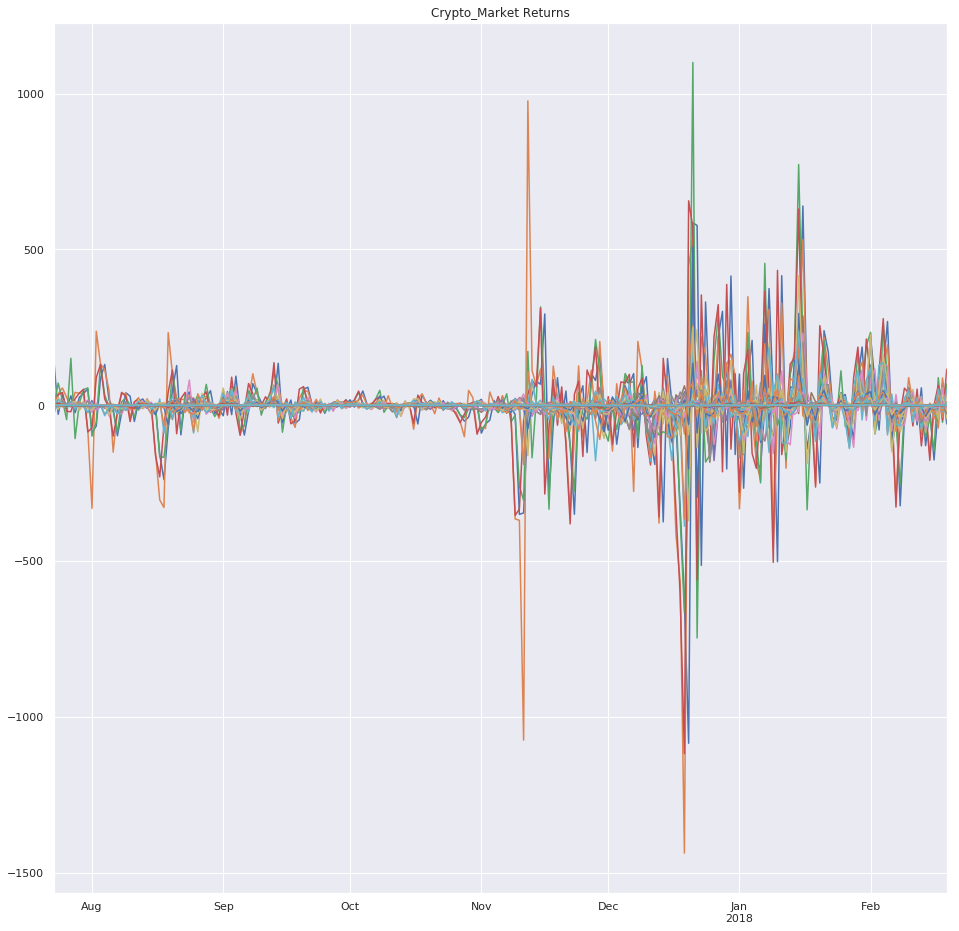

In [9]:
print("------------------------------")
print("Running script for main model!")
print("------------------------------")
# %run Universal_Measure_Valued_Networks_Backend.ipynb
exec(open('Universal_Measure_Valued_Networks_Backend.py').read())

print("------------------------------------")
print("Done: Running script for main model!")
print("------------------------------------")

---
# Run: All Benchmarks

## 1) *Pointmass Benchmark(s)*
These benchmarks consist of subsets of $C(\mathbb{R}^d,\mathbb{R})$ which we lift to models in $C(\mathbb{R}^d,\cap_{1\leq q<\infty}\mathscr{P}_{q}(\mathbb{R}))$ via:
$$
\mathbb{R}^d \ni x \to f(x) \to \delta_{f(x)}\in \cap_{1\leq q<\infty}\mathcal{P}_{q}(\mathbb{R}).
$$

In [ ]:
exec(open('CV_Grid.py').read())
# Notebook Mode:
# %run Evaluation.ipynb
# %run Benchmarks_Model_Builder_Pointmass_Based.ipynb
# Terminal Mode (Default):
exec(open('Evaluation.py').read())
exec(open('Benchmarks_Model_Builder_Pointmass_Based.py').read())

# Summary of Point-Mass Regression Models

#### Training Model Facts

In [ ]:
print(Summary_pred_Qual_models)
Summary_pred_Qual_models

#### Testing Model Facts

In [ ]:
print(Summary_pred_Qual_models_test)
Summary_pred_Qual_models_test

#### Model Complexitie(s)

In [ ]:
print(Summary_Complexity_models)
Summary_Complexity_models

## 2) *Gaussian Benchmarks*

- Bencharm 1: [Gaussian Process Regressor](https://scikit-learn.org/stable/modules/gaussian_process.html)
- Benchmark 2: Deep Gaussian Networks:
These models train models which assume Gaussianity.  We may view these as models in $\mathcal{P}_2(\mathbb{R})$ via:
$$
\mathbb{R}^d \ni x \to (\hat{\mu}(x),\hat{\sigma}(x))\triangleq f(x) \in \mathbb{R}\times [0,\infty) \to \frac1{\hat{\sigma}(x)\sqrt{2\pi}}\exp\left(\frac{-(\cdot-\hat{\mu}(x))^2}{\hat{\sigma(x)}^2}\right) \in \mathcal{G}_1\subset \mathcal{P}_2(\mathbb{R});
$$
where $\mathcal{G}_1$ is the set of Gaussian measures on $\mathbb{R}$ equipped with the relative Wasserstein-1 topology.

Examples of this type of architecture are especially prevalent in uncertainty quantification; see ([Deep Ensembles](https://arxiv.org/abs/1612.01474)] or [NOMU: Neural Optimization-based Model Uncertainty](https://arxiv.org/abs/2102.13640).  Moreover, their universality in $C(\mathbb{R}^d,\mathcal{G}_2)$ is known, and has been shown in [Corollary 4.7](https://arxiv.org/abs/2101.05390).

In [ ]:
# %run Benchmarks_Model_Builder_Mean_Var.ipynb
exec(open('Benchmarks_Model_Builder_Mean_Var.py').read())

In [ ]:
print("Prediction Quality (Updated)")
print(Summary_pred_Qual_models_test)
Summary_pred_Qual_models_test

In [ ]:
print("Model Complexities Quality (Updated)")
print(Summary_Complexity_models)
Summary_Complexity_models

# 3) The natural Universal Benchmark: [Bishop's Mixture Density Network](https://publications.aston.ac.uk/id/eprint/373/1/NCRG_94_004.pdf)

This implementation is as follows:
- For every $x$ in the trainingdata-set we fit a GMM $\hat{\nu}_x$, using the [Expectation-Maximization (EM) algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), with the same number of centers as the deep neural model in $\mathcal{NN}_{1_{\mathbb{R}^d},\mathcal{D}}^{\sigma:\star}$ which we are evaluating.  
- A Mixture density network is then trained to predict the infered parameters; given any $x \in \mathbb{R}^d$.

In [ ]:
# %run Mixture_Density_Network.ipynb
exec(open('Mixture_Density_Network.py').read())

## Get Final Outputs
Now we piece together all the numerical experiments and report a nice summary.

In [ ]:
# %run WrapUp_Summarizer.ipynb
exec(open('WrapUp_Summarizer.py').read())

# Result(s)

## Model Complexities

In [ ]:
Summary_Complexity_models

## Prediction Quality

#### Training

In [ ]:
PredictivePerformance_Metrics_Train

#### Test

In [ ]:
PredictivePerformance_Metrics_Test

# For Terminal Runner(s):

In [ ]:
# For Terminal Running
print(" ")
print(" ")
print(" ")
print("====================================")
print("Model Complexity Predictive Quality:")
print("====================================")
print(" ")
print(" ")
print(" ")
print(Summary_Complexity_models)
print(" ")
print(" ")
print(" ")
print("============================")
print("Training Predictive Quality:")
print("============================")
print(PredictivePerformance_Metrics_Train)
print(" ")
print(" ")
print(" ")
print("===========================")
print("Testing Predictive Quality:")
print("===========================")
print(PredictivePerformance_Metrics_Test)
print("================================")
print(" ")
print(" ")
print(" ")
print("Kernel_Used_in_GPR: "+str(GPR_trash.kernel))
print("🙃🙃 Have a wonderful day! 🙃🙃")

---
# Fin
---

---